In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Read File
file = 'datasets/breastCancer.csv'
df = pd.read_csv(file)
df.info()
df.isnull().sum()

In [3]:
# Clean data
df = df.dropna(how='all', axis='columns')
df = df.drop(labels='id', axis='columns')
df = df.replace(to_replace=['M', 'B'], value=['1', '0'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


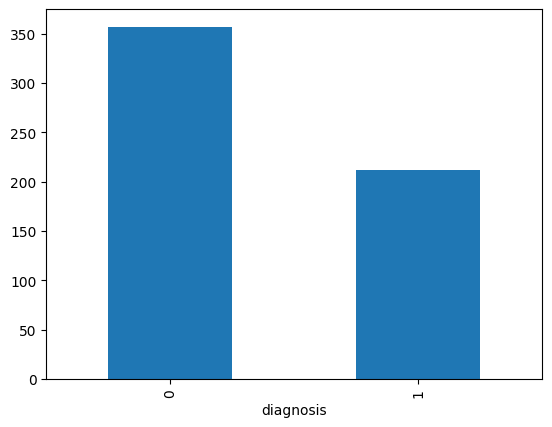

In [4]:
# Set data
ax = df['diagnosis'].value_counts().plot(kind='bar')

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].values

# Data split
xtrain, xtest, ytrain, ytest, = train_test_split(x, y, test_size=0.3, random_state=45)

In [5]:
# Training - Multi Layer Perceptron
model = MLPClassifier(alpha=1, max_iter=2000)
model.fit(xtrain, ytrain)

print("Train: ", {model.score(xtrain, ytrain)})
print("Test: ", {model.score(xtest, ytest)})

Train:  {0.9296482412060302}
Test:  {0.9298245614035088}


In [6]:
# Classification Report
ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)

print("Classification Report: \n", classification_report(ytest, ytestpred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       110
           1       0.93      0.87      0.90        61

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



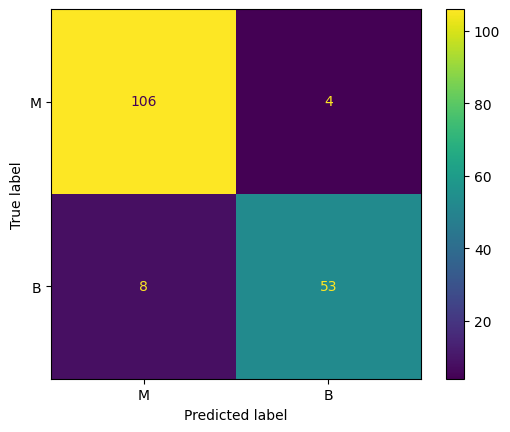

In [7]:
# Confusion Matrix
class_names=["M","B"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()